# 1) PROBLEM STATEMENT

The objective of this case study is to help Yulu find which variables are significant in predicting the demand for shared electric cycles in the Indian market.
How well those variables describe the electric cycle demands.

In [126]:
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,ttest_1samp,kstest,norm
from scipy.stats import chi2_contingency,chi2
from scipy.stats import pearsonr,f_oneway

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("yulu_dataset.txt")

In [5]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum().sum()

0

**Observation**

The dataset has neither duplicate rows nor has it any duplicate value.

In [3]:
df1=df.copy()

In [10]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df1['datetime']=pd.to_datetime(df1['datetime'])

In [50]:
df1[['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


# Univariate analysis

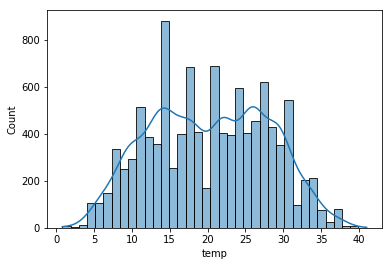

In [63]:
sns.histplot(df1['temp'],kde=True)
plt.show()

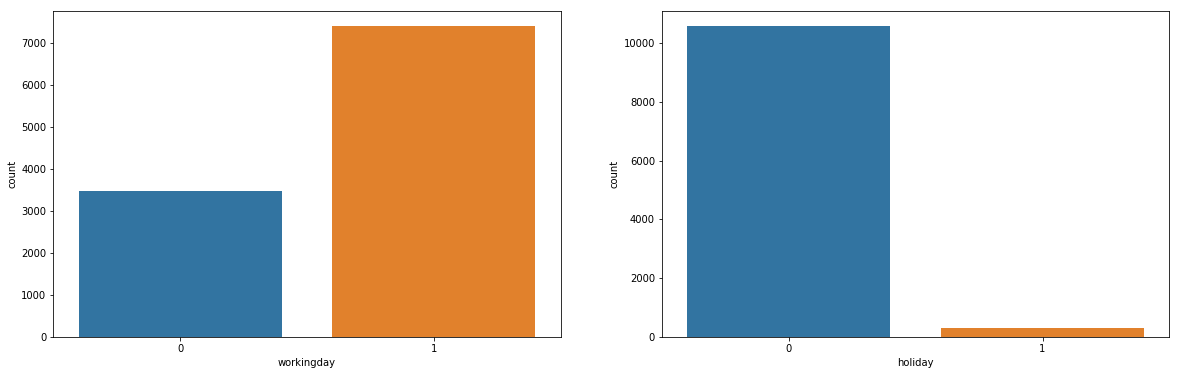

In [86]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(df1['workingday'],ax=axis[0])
#plt.legend()
sns.countplot(df1['holiday'],ax=axis[1])
plt.show()

**Observation**

1. 1 i.e working days(non weekend and non holidays) has more users of Yulu bikes .
2. 0 i.e non holidays day has more yulu bikes users.
3. Users prefer temperature between 11 and 30 to use Yulu bikes.

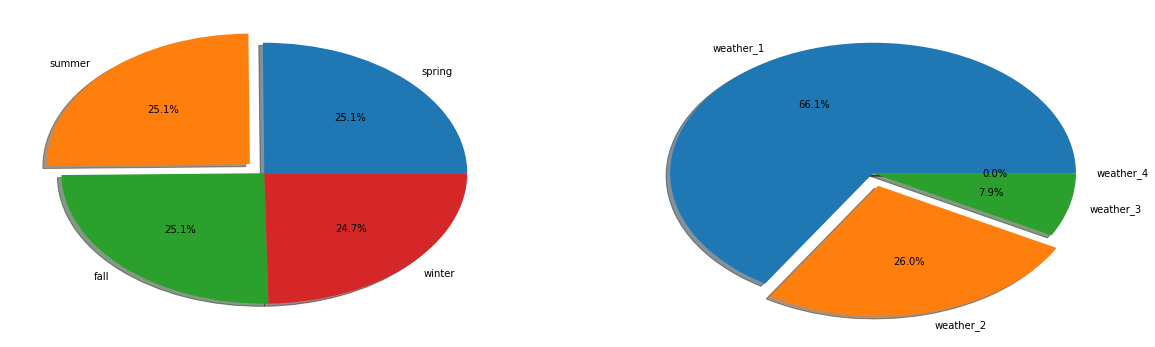

In [41]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
total_seasons=df1['season'].value_counts()
total_weathers=df1['weather'].value_counts()
explode = (0, 0.1, 0, 0)
label2='weather_1','weather_2','weather_3','weather_4'
#1: spring, 2: summer, 3: fall, 4: winter)
label1='spring','summer','fall','winter'
#print(total_seasons)
axis[0].pie(total_seasons,explode=explode,labels=label1,autopct='%1.1f%%',shadow=True)
axis[1].pie(total_weathers,explode=explode,labels=label2,autopct='%1.1f%%',shadow=True)
plt.show()

**Observation**

The dataset is almost distributed equally among seasons while most data has weather1.
We can conclude people prefer Yulu irrespective of seasons but if the weather is weather_1 i.e  Clear, Few clouds, partly cloudy, partly cloudy, then they prefer using YULU bikes.

# Bivariate Analysis

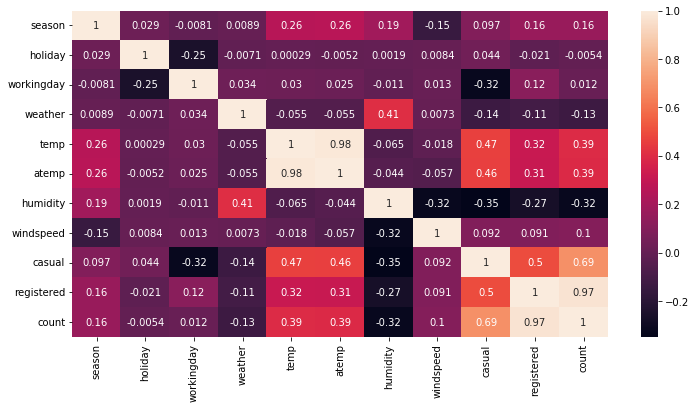

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True)
plt.show()

**Observation **

Here Correlation analysis can reveal meaningful relationships between different metrics or groups of metrics. 

1.Temperature and feeling temperature are strongly positively correlated.  
2.While season and weather or season and workingday has almost no correlation.

In [98]:
print("The total length of the dataset is ",df1.shape[0])
print("The total column of the dataset is ",df1.shape[1])

The total length of the dataset is  10886
The total column of the dataset is  12


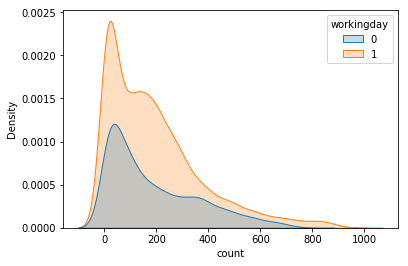

In [102]:
sns.kdeplot(data=df1,x='count',hue='workingday',fill=True)
plt.show()

**Observation**

1. Non holiday days i.e 0 have significantly higher users of Yulu bikes over days when its weekend or its a holiday.

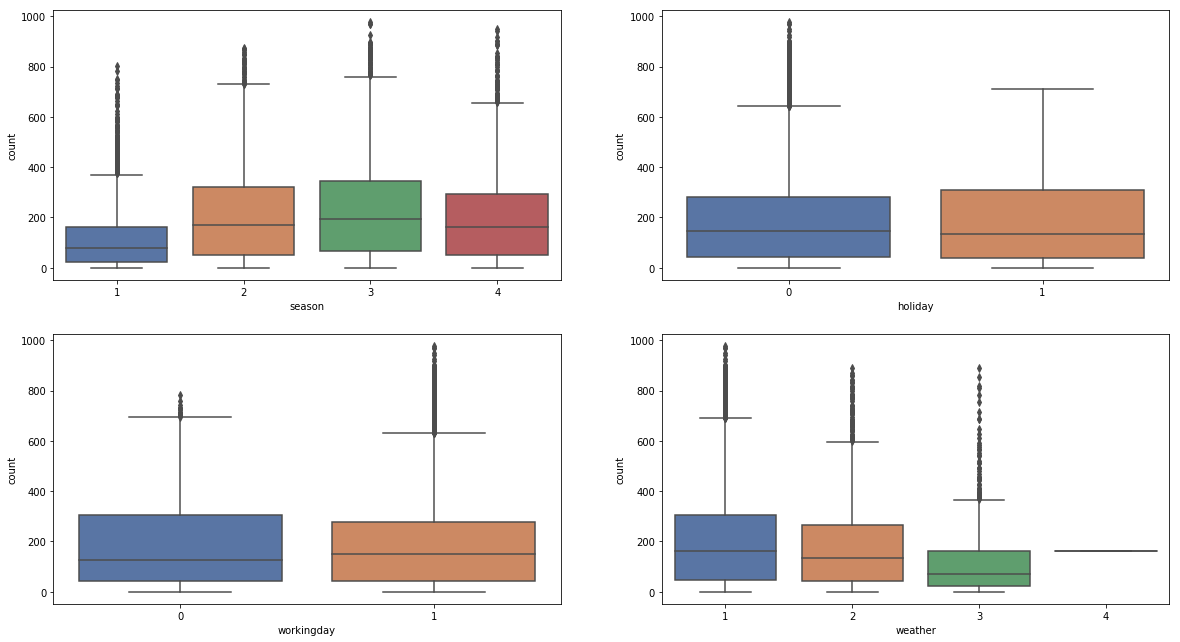

In [111]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df1, y='count', x='season',  palette='deep', ax=axs[0,0])
sns.boxplot(data=df1, y='count', x='holiday',  palette='deep', ax=axs[0,1])

sns.boxplot(data=df1, y='count', x='workingday',  palette='deep', ax=axs[1,0])
sns.boxplot(data=df1, y='count', x='weather',  palette='deep', ax=axs[1,1])


plt.show()

In [113]:
df1.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [116]:
df1.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [117]:
df1.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [118]:
df1.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


**Observation **

1. A lot of outliers are present in above boxplots.

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


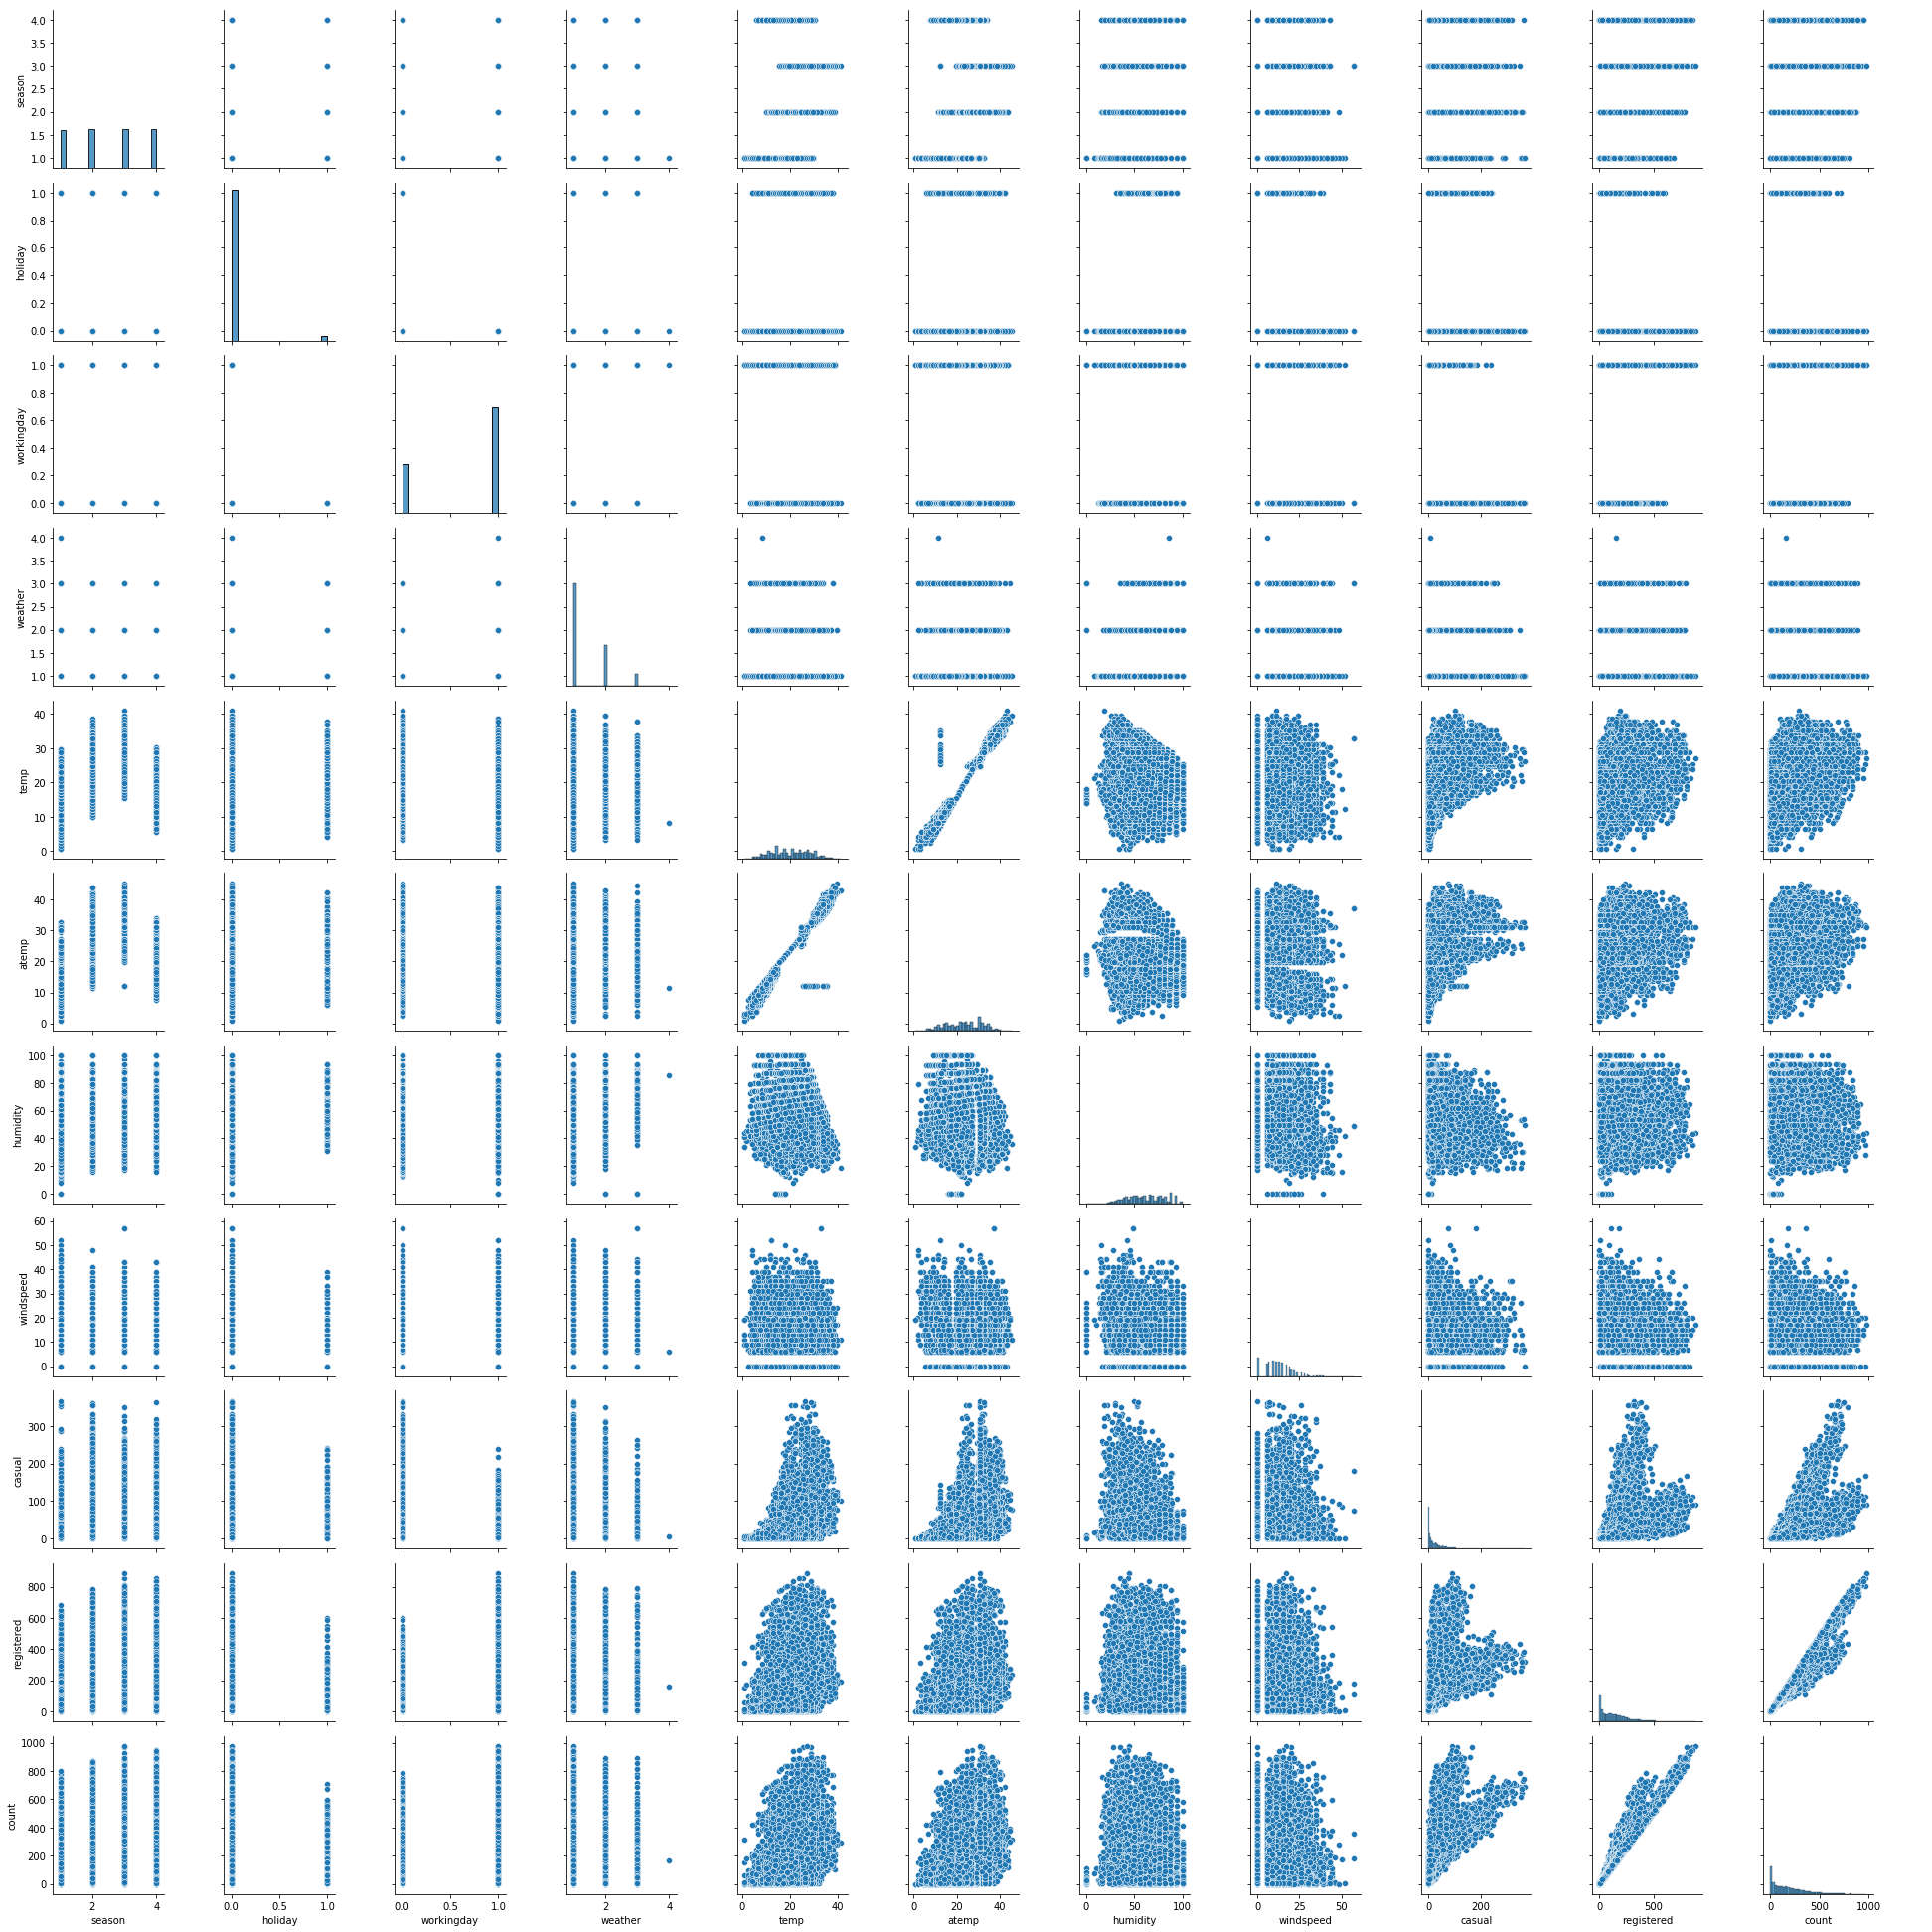

In [120]:
sns.pairplot(df1)
plt.show()

# Hypothesis Testing

Q1. Whether working days has effect on no of yulu bikes users?


[]

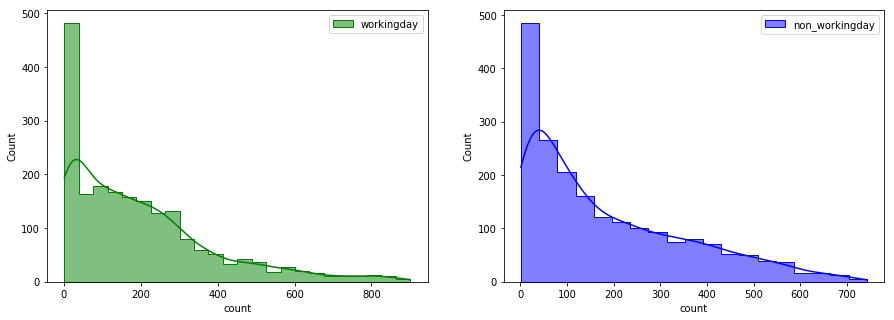

In [16]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1.loc[df1['workingday'] == 1, 'count'].sample(2000), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df1.loc[df1['workingday'] == 0, 'count'].sample(2000), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

The distribution doesnt follow normal distribution.

Check for normality.

Ks test.

Ho=Gaussian distribution
Ha=Not a gaussian distribution

In [28]:
nonwork=df1[df1['workingday']==0]['count']
z_nonwork=(nonwork-nonwork.mean())/nonwork.std()
k_stats,p_value=kstest(z_nonwork,norm.cdf)
print('p_value',p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p_value 4.7244927562341644e-60
The sample does not follow normal distribution


In [30]:
work=df1[df1['workingday']==1]['count']
z_work=(work-work.mean())/work.std()
k_stats,p_value=kstest(z_work,norm.cdf)
print('p_value',p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p_value 3.76965331505378e-144
The sample does not follow normal distribution


# Using Ks test we saw it doesn't follow Normal distribution so Ttest can't be used.

Null Hypothesis: Ho= Working days has no impact on no of yulu bikes used, i.e independent of day   
Alternate Hypothesis: Ha= Working days has impact on no of yulu bikes users.

Mathematically, Ho: mu1=mu2  
                Ha: mu1>mu2
                
We will take 95% confidence, i.e . alpha = 0.05

So if p-value> alpha => Fail to reject Ho
and if p-value< alpha => Reject Ho.

In [41]:
temp=pd.crosstab(columns=df1['count'],index=df1['workingday'])
chi_stat,p_value,df,exp_freq=chi2_contingency(temp)
print('p_value',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is not same for working and non-working days')

p_value 1.2403687967441548e-05
Mean no.of electric cycles rented is same for working and non-working days


# Alternative method

In [80]:
#work and nonwork
print("The variance of working day is : ",np.var(work))
print("The variance of non-working day is : ",np.var(nonwork))

the variance of working day is :  34040.697106746935
the variance of non-working day is :  30171.34609894243


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [132]:
t_stats,p_value=ttest_ind(work, nonwork, equal_var=True)
print('p_value',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

p_value 0.22644804226361348
Mean no.of electric cycles rented is same for working and non-working days


Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

# ANNOVA to check if No. of cycles rented is similar or different in 
# 1. weather 
# 2. season 

In [43]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
df1['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [51]:
def season_rename(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df1['season'] = df1['season'].apply(season_rename)

In [52]:
df1.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [59]:
spring_season = df1[df1['season'] == 'spring']['count']
summer_season = df1[df1['season'] == 'summer']['count']
fall_season = df1[df1['season'] == 'fall']['count']
winter_season = df1[df1['season'] == 'winter']['count']

In [82]:
df1['season'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

Null Hypothesis: Ho= Season has no impact on sales  
Alternate Hypothesis: Ha= Season has impact on sales.

Mathematically, Ho: mu1=mu2 (i.e mean no of cycles is same for all season)

                Ha: mu1>mu2 (i.e mean no of cycles is different for all season)
                
We will take 95% confidence, i.e . alpha = 0.05

So if p-value> alpha => Fail to reject Ho
and if p-value< alpha => Reject Ho.

In [130]:
f_stats,p_value=f_oneway(spring_season,summer_season,fall_season,winter_season)
print('p_value',p_value)
if p_value < 0.05:
    print('Season has impact on sales of bicycle')
else:
    print('Season has no impact on sales of bicycle')

p_value 6.164843386499654e-149
Season has impact on sales of bicycle


##### Therefore, the average number of rental bikes is statistically different for different seasons.

In [64]:
weather1= df1[df1['weather'] == 1]['count']
weather2 = df1[df1['weather'] == 2]['count']
weather3 = df1[df1['weather'] == 3]['count']
weather4 = df1[df1['weather'] == 4]['count']

In [90]:
df1['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Null Hypothesis: Ho= Weather has no impact on sales  
Alternate Hypothesis: Ha= Weather has impact on sales.

Mathematically, Ho: mu1=mu2 (i.e mean no of cycles is same for all weather)

                Ha: mu1>mu2 (i.e mean no of cycles is different for all weather)
                
We will take 95% confidence, i.e . alpha = 0.05

So if p-value> alpha => Fail to reject Ho
and if p-value< alpha => Reject Ho.

#### Since weather 4 has only 1 data point so we will ignore it for the test.

In [131]:
f_stats,p_value=f_oneway(weather1,weather2,weather3)
print('p_value',p_value)
if p_value < 0.05:
    print('Weather has impact on sales of bicycle')
else:
    print('Weather has no impact on sales of bicycle')

p_value 4.976448509904196e-43
Weather has impact on sales of bicycle


##### Therefore, the average number of rental bikes is statistically different for different weathers.

In [67]:
f_oneway(weather1,weather2,weather3)

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

# Chi-square test to check if Weather is dependent on the season

In [70]:
df1[['weather', 'season']].describe(include='all')

,weather,season
count,10886.000000,10886
unique,NaN,4
top,NaN,winter
freq,NaN,2734
mean,1.418427,NaN
std,0.633839,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.000000,NaN
75%,2.000000,NaN


In [120]:
cross_table = pd.crosstab(index = df1['season'], 
                          columns = df1['weather'], 
                          values = df1['count'], 
                          aggfunc = np.sum).to_numpy()
print(cross_table)
real_cross=cross_table[:,0:3]
real_cross

[[4.70116e+05 1.39386e+05 3.11600e+04         nan]
 [2.23009e+05 7.64060e+04 1.29190e+04 1.64000e+02]
 [4.26350e+05 1.34177e+05 2.77550e+04         nan]
 [3.56588e+05 1.57191e+05 3.02550e+04         nan]]


array([[470116., 139386.,  31160.],
       [223009.,  76406.,  12919.],
       [426350., 134177.,  27755.],
       [356588., 157191.,  30255.]])

Null Hypothesis: Ho= Weather is independent of season.  
Alternate Hypothesis: Ha= Weather is dependent on season

We will take 95% confidence, i.e . alpha = 0.05

So if p-value> alpha => Fail to reject Ho
and if p-value< alpha => Reject Ho.

In [133]:
chi_test_stat, p_value, dof, expected = chi2_contingency(real_cross)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
if p_value < 0.05:
    print('Weather is dependent of season')
else:
    print('Weather is independent of season')

Test Statistic = 10838.372332480214
p value = 0.0
Weather is dependent of season


### Observation

1.The dataset is almost distributed equally among seasons while most data has weather1.
We can conclude people prefer Yulu irrespective of seasons but if the weather is weather_1 i.e  Clear, Few clouds, partly cloudy, partly cloudy, then they prefer using YULU bikes.

2.Temperature and feeling temperature are strongly positively correlated. 

3.While season and weather or season and workingday has almost no correlation.

4 Working days(non weekend and non holidays) has more users of Yulu bikes .

5.Non holidays day has more yulu bikes users.

6.Users prefer temperature between 11 and 30 to use Yulu bikes.

7.The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
  -> There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
  
  -> The hourly total number of rental bikes is statistically different for different weathers.
  
  -> There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of         bikes rented.
  
  -> The hourly total number of rental bikes is statistically different for different seasons.
  
  -> Weather is dependent of season.

### Recomendation

1. Since working days has more no of users , so Yulu can adjust its pricing according to its goals . and have more bikes availability during these days.

2. Tempertature ranging between 11 and 30 has highest number of users, so Yulu can have dynamic pricing during these times to earn extra profit.

3. Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

4. Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.